## About iPython Notebooks ##

iPython Notebooks are interactive coding environments embedded in a webpage. You will be using iPython notebooks in this class. Make sure you fill in any place that says `# BEGIN CODE HERE #END CODE HERE`. After writing your code, you can run the cell by either pressing "SHIFT"+"ENTER" or by clicking on "Run" (denoted by a play symbol). Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). 

 **What you need to remember:**

- Run your cells using SHIFT+ENTER (or "Run cell")
- Write code in the designated areas using Python 3 only
- Do not modify the code outside of the designated areas
- In some cases you will also need to explain the results. There will also be designated areas for that. 

Fill in your **NAME** and **AEM** below:

In [1]:
NAME = "Konstantinos Petridis"
AEM = "9403"

---

# Assignment 2 - Decision Trees #

Welcome to your second assignment. This exercise gives you an introduction to [scikit-learn](https://scikit-learn.org/stable/). A simple but efficient machine learning library in Python. It also gives you a wide understanding on how decision trees work. 

After this assignment you will:
- Be able to use the scikit-learn library and train your own model from scratch.
- Be able to train and understand decision trees.

In [2]:
# Always run this cell
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import matplotlib.pyplot as plt

# USE THIS RANDOM VARIABLE TO PRODUCE THE SAME RESULTS
RANDOM_VARIABLE = 42

## 1. Scikit-Learn and Decision Trees ##

You are going to use the scikit-learn library to train a model for detecting breast cancer using the [Breast cancer wisconsin (diagnostic) dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer) (+ [Additional information](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset)) by training a model using [decision trees](https://scikit-learn.org/stable/modules/tree.html).

**1.1** Load the breast cancer dataset using the scikit learn library and split the dataset into train and test set using the appropriate function. Use 33% of the dataset as the test set. Define as X the attributes and as y the target values. Do not forget to set the random_state parameter as the *RANDOM_VARIABLE* defined above. Use this variable for all the random_state parameters in this assignment.

In [3]:
# BEGIN CODE HERE
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                    random_state=RANDOM_VARIABLE,
                                                    shuffle=True)

#END CODE HERE

In [4]:
print("Size of train set:{}".format(len(y_train)))
print("Size of test set:{}".format(len(y_test)))
print("Unique classes:{}".format(len(set(y_test))))

Size of train set:381
Size of test set:188
Unique classes:2


**Expected output**:  

```
Size of train set:381  
Size of test set:188  
Unique classes:2
```



**1.2** Train two DecisionTree classifiers and report the F1 score. Use the information gain for the one classifier and the Gini impurity for the other

In [5]:
# BEGIN CODE HERE
classifier_gini = DecisionTreeClassifier(criterion='gini', random_state=RANDOM_VARIABLE)
classifier_igain = DecisionTreeClassifier(criterion='entropy', random_state=RANDOM_VARIABLE)

classifier_gini.fit(X_train, y_train)
classifier_igain.fit(X_train, y_train)

prediction_gini = classifier_gini.predict(X_test)
prediction_igain = classifier_igain.predict(X_test)

f_measure_gini = f1_score(y_test, prediction_gini)
f_measure_igain = f1_score(y_test, prediction_igain)

#END CODE HERE

In [6]:
print("F-Measure Gini: {}".format(f_measure_gini))
print("F-Measure Information Gain: {}".format(f_measure_igain))

F-Measure Gini: 0.9372384937238494
F-Measure Information Gain: 0.9596774193548386


**Expected output**:  

```
F-Measure Gini: 0.9372384937238494
F-Measure Information Gain: 0.9596774193548386
```

**1.3** Find the maximum depth reached by the tree that used the Gini impurity. Train multiple classifiers by modifying the max_depth within the range from 1 to maximum depth and save the f1 scores to the corresponding list of the *fscores* dictionary (one list for training set and one for test set). Before appending the scores to the corresponding list, multiply them by 100, and round the values to 2 decimals.

In [7]:
from scipy.sparse.construct import rand
# BEGIN CODE HERE
depth = 7
# print(depth)
fscores = {}
fscores['train'] = []
fscores['test'] = []

for i in range(1, depth + 1):
    clf = DecisionTreeClassifier(criterion='gini', max_depth=i, random_state=RANDOM_VARIABLE)
    clf.fit(X_train, y_train)
    fscores['train'].append(round(100 * f1_score(y_train, clf.predict(X_train)), 2))
    fscores['test'].append(round(100 * f1_score(y_test, clf.predict(X_test)), 2))
#END CODE HERE

In [8]:
print("Fscores Train: {}".format(fscores['train']))
print("Fscores Test:  {}".format(fscores['test']))


Fscores Train: [94.24, 95.46, 97.65, 99.15, 99.37, 99.58, 100.0]
Fscores Test:  [91.14, 93.97, 96.64, 94.12, 95.4, 95.04, 93.72]


**Expected output**:  
```
Fscores Train: [94.24, 95.46, 97.65, 99.15, 99.37, 99.58, 100.0]
Fscores Test:  [91.14, 93.97, 96.64, 94.12, 95.4, 95.04, 93.72]
```

**1.4** Compare the results from the train set with the results from the test set. What do you notice? How are you going to choose the max_depth of your model?

*YOUR* ANSWER HERE

In [9]:
"""
We notice that when we increase the max depth, the model performs better on the
training set, however it reaches a point after which, overfitting occurs. This
phenomenon is prominent if we observe the score on the test set, which, after
a max_depth of 3, begins to gradually decrease, while the improvement rate on the
training set decreases drastically. Based on the results, the optimal max_depth
for the best model accuracy on both data sets, is 
max_depth=3 and max_depth=5
"""

'\nWe notice that when we increase the max depth, the model performs better on the\ntraining set, however it reaches a point after which, overfitting occurs. This\nphenomenon is prominent if we observe the score on the test set, which, after\na max_depth of 3, begins to gradually decrease, while the improvement rate on the\ntraining set decreases drastically. Based on the results, the optimal max_depth\nfor the best model accuracy on both data sets, is \nmax_depth=3 and max_depth=5\n'

## 2.0 Pipelines ##

**2.1** In this part of the exercise you are going to build a pipeline from scratch for a classification problem. Load the **income.csv** file and train a DecisionTree model that will predict the *income* variable. This dataset is a modification of the original Adult Income dataset found [here](http://archive.ics.uci.edu/ml/datasets/Adult). Report the f1-score and accuracy score of the test set found in **income_test.csv**. Your pipeline should be able to handle missing values and categorical features (scikit-learn's decision trees do not handle categorical values). You can preprocess the dataset as you like in order to achieve higher scores.  

In [10]:
# BEGIN CODE HERE
train_set = pd.read_csv('income.csv')
train_set['income'] = train_set['income'].map({ "<=50K": 0, ">50K": 1 })
X_train = train_set.drop(['income'], axis=1)
y_train = train_set['income']


test_set = pd.read_csv('income_test.csv')
test_set['income'] = test_set['income'].map({ "<=50K": 0, ">50K": 1 })
X_test = test_set.drop(['income'], axis=1)
y_test = test_set['income']

# any other code you need
# End CODE HERE

**2.2** Create and test your pipeline

In [11]:
#Your pipeline
from sklearn.preprocessing import LabelEncoder

categorical_features = ['workclass', 'education', 'marital-status',
                        'occupation', 'relationship', 'race', 'sex']

categorical_transformer = Pipeline(
    steps=[
           ('imputer', SimpleImputer(strategy='most_frequent')),
           ('encoding', OneHotEncoder())
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_transformer, categorical_features)
    ]
)

clf = Pipeline(
    steps=[
          ('preprocessor', preprocessor),
          ('classifier', DecisionTreeClassifier())
    ]
)

clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

In [12]:
print("Model score Accuracy: %.3f" % accuracy_score(y_test, y_predict))
print("Model score F1 Weighted: %.3f" % f1_score(y_test, y_predict,average='weighted'))

Model score Accuracy: 0.816
Model score F1 Weighted: 0.809


**2.3** Perform a gooood grid search to find the best parameters for your pipeline

In [13]:
param_grid = {
    "classifier__max_depth": [7, 10, 14, 18, 21, 24],
    "classifier__criterion": ["gini","entropy"],
    "classifier__max_features": [0.25, 0.5, 0.75, None],
    "classifier__min_samples_leaf": [5, 10, 20, 40, 50],
}

grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
y_predict = grid_search.predict(X_test)

print("Best params:")
print(grid_search.best_params_)

Best params:
{'classifier__criterion': 'entropy', 'classifier__max_depth': 24, 'classifier__max_features': 0.75, 'classifier__min_samples_leaf': 10}


In [14]:
print("Model score Accuracy: %.3f" % accuracy_score(y_test,y_predict))
print("Model score F1 Weighted: %.3f" % f1_score(y_test,y_predict,average='weighted'))

Model score Accuracy: 0.827
Model score F1 Weighted: 0.818


**2.4** Describe the process you followed to achieve the results above. Your description should include, but is not limited to the following 
- How do you handle missing values and why
- How do you handle categorical variables and why
- Any further preprocessing steps
- How do you evaluate your model and how did you choose its parameters 
- Report any additional results and comments on your approach.

You should achieve at least 85% accuracy score and 84% f1 score.

YOUR ANSWER HERE

In [15]:
"""
1) After examining the data set, we observe that no numerical values are missing.
However, there are two parameters with missing values, which are both of type
object (string). One first thought would be to exclude all entries with missing 
values, however here we prefer another strategy, to take advantage of the entire
dataset. We fill the missing values using the most frequently encountered
value, which seems to make sense statistically.

2) Categorical values are handled, by applying a one hot encoding on all 
categorical features, since Tree models in sklearn can only deal with numerical
values. We prefer One Hot Encoding instead of a regular Label Encoding (assignement
of a single number to each feature), because this leads in some arbitrary relations
between them (which in most cases are wrong). For example Male:0 and Female:1
means that Male<Female which does not make sense based on the real meanings of 
the variables.

3) No further preprocessing steps.

4) The parameters were initially chosen in an arbitrary manner. Observation of
the evaluation results provided necessary information to modify some parameters
and achieve a better accuracy. For example at first i had the max value for the 
max depth to be 10, and the model performed best at that value. So i increased it
until i noticed a decrease in the accuracy. 
"""

'\n1) After examining the data set, we observe that no numerical values are missing.\nHowever, there are two parameters with missing values, which are both of type\nobject (string). One first thought would be to exclude all entries with missing \nvalues, however here we prefer another strategy, to take advantage of the entire\ndataset. We fill the missing values using the most frequently encountered\nvalue, which seems to make sense statistically.\n\n2) Categorical values are handled, by applying a one hot encoding on all \ncategorical features, since Tree models in sklearn can only deal with numerical\nvalues. We prefer One Hot Encoding instead of a regular Label Encoding (assignement\nof a single number to each feature), because this leads in some arbitrary relations\nbetween them (which in most cases are wrong). For example Male:0 and Female:1\nmeans that Male<Female which does not make sense based on the real meanings of \nthe variables.\n\n3) No further preprocessing steps.\n\n4) 

## 3.0 Common Issues ## 

**3.0** Run the following code to define a DecisionTreeModel and load the **income** dataset only with the numerical variables. Then, answer the following questions. 

In [16]:
# Load Data
columns = ['age','fnlwgt','education_num','hours-per-week',"capital-loss","capital-gain","income"]
data = pd.read_csv('income.csv',usecols=columns)
data_test = pd.read_csv('income_test.csv',usecols=columns)
# Convert target variable to 0 and 1
data["income"] = data["income"].map({ "<=50K": 0, ">50K": 1 })
data_test["income"] = data_test["income"].map({ "<=50K": 0, ">50K": 1 })
# Create X and y
X_train = data.drop(["income"],axis=1)
y_train = data['income'].values
X_test = data_test.drop(["income"],axis=1)
y_test = data_test['income'].values
# Classifier
classifier = DecisionTreeClassifier(min_samples_leaf=4)
classifier.fit(X_train,y_train)
accuracy_score = accuracy_score(y_test,y_predict)
print("Model score accuracy: %.3f" % accuracy_score)

Model score accuracy: 0.827


**3.1** Evaluate the classifier using at least three evaluation metrics except accuracy_score and f1 (weighted).

In [17]:
from sklearn.metrics import balanced_accuracy_score, average_precision_score, f1_score
y_predict = classifier.predict(X_test)

# BEGIN CODE HERE
metric1 = balanced_accuracy_score(y_test, y_predict, adjusted=True)
metric2 = average_precision_score(y_test, y_predict, average='weighted')
metric3 = f1_score(y_test, y_predict, average='weighted')
#END CODE HERE

In [18]:
print("Model score Metric 1: %.3f" % metric1)
print("Model score Metric 2: %.3f" % metric2)
print("Model score Metric 3: %.3f" % metric3)

Model score Metric 1: 0.375
Model score Metric 2: 0.414
Model score Metric 3: 0.783


**3.2** Do you notice any problems with the classifier? If so, what can you do to change this.

In [19]:
"""
So, the problem here is obviously overfitting, as we have applied an exhaustive
grid search to compute the optimal parameters for our model, based on its 
performance on the training set exclusively. As a result, although performing
good on the training set, our model fails to handle data, that are not seen 
before with a reasonable accuracy.

In order to resolve this issue, we should apply different methods and observe 
the effect that they have on the model's accuracy:

1) Using validation set
2) Requiring a minimum number of examples in a node
3) Limiting the maximum depth
4) Splitting the dataset into k-folds and using cross validation to compute the
   optimal parameters
"""

"\nSo, the problem here is obviously overfitting, as we have applied an exhaustive\ngrid search to compute the optimal parameters for our model, based on its \nperformance on the training set exclusively. As a result, although performing\ngood on the training set, our model fails to handle data, that are not seen \nbefore with a reasonable accuracy.\n\nIn order to resolve this issue, we should apply different methods and observe \nthe effect that they have on the model's accuracy:\n\n1) Using validation set\n2) Requiring a minimum number of examples in a node\n3) Limiting the maximum depth\n4) Splitting the dataset into k-folds and using cross validation to compute the\n   optimal parameters\n"

**3.3** Implement your solution using the cells below. Report your results and the process you followed. You are reccommended to use stratification and grid search. You should only have to increase a little bit the metrics you calculated above, and also reach an accuracy score higher than 82%!

In [20]:
from sklearn.model_selection import KFold, StratifiedKFold

columns = ['age','fnlwgt','education_num','hours-per-week',"capital-loss","capital-gain","income"]
data = pd.read_csv('income.csv',usecols=columns)
data_test = pd.read_csv('income_test.csv',usecols=columns)
# Convert target variable to 0 and 1
data["income"] = data["income"].map({ "<=50K": 0, ">50K": 1 })
data_test["income"] = data_test["income"].map({ "<=50K": 0, ">50K": 1 })

# data.info()
data = np.vstack((np.array(data), np.array(data_test)))
# pd.DataFrame(data)

X = pd.DataFrame(data[:,0:6])
y = pd.DataFrame(data[:,6])

X_train, X_test, y_train, y_test = \
                        train_test_split(X, y, test_size=0.4, random_state=0,
                                         shuffle=True, stratify=y)
                      
cv_inner = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
tree = DecisionTreeClassifier(random_state=0)

param_grid = {
    "max_depth": [5, 10],
    "criterion": ["gini","entropy"],
    "min_samples_leaf": [20, 40, 50, 70],
}

grid_search = GridSearchCV(tree, param_grid, cv=cv_inner, scoring='accuracy')
grid_search.fit(X_train, y_train)
y_predict = grid_search.predict(X_test)

print("Best params:")
print(grid_search.best_params_)

Best params:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 20}


In [21]:
metric1 = balanced_accuracy_score(y_test, y_predict, adjusted=False)
metric2 = average_precision_score(y_test, y_predict, average='weighted')
metric3 = f1_score(y_test, y_predict, average='weighted')

print("Model score accuracy: %.3f" % accuracy_score)
print("Model score Metric 1: %.3f" % metric1)
print("Model score Metric 2: %.3f" % metric2)
print("Model score Metric 3: %.3f" % metric3)

Model score accuracy: 0.827
Model score Metric 1: 0.700
Model score Metric 2: 0.467
Model score Metric 3: 0.813


In [22]:
# BEGIN CODE HERE

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=1, stratify=y_train)

for d in range(1,15,1):
    print("Depth %d" %d)
    tree = DecisionTreeClassifier(max_depth=d, random_state=0)
    tree.fit(X_train, y_train)
    print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
    print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

# Train new model
tree = DecisionTreeClassifier(max_depth=11, random_state=0)
tree.fit(X_train, y_train)
y_predict = tree.predict(X_test)

# evaluation metrics
metric1 = balanced_accuracy_score(y_test, y_predict, adjusted=False)
metric2 = average_precision_score(y_test, y_predict, average='weighted')
metric3 = f1_score(y_test, y_predict, average='weighted')

print("Model score accuracy: %.3f" % accuracy_score)
print("Model score Metric 1: %.3f" % metric1)
print("Model score Metric 2: %.3f" % metric2)
print("Model score Metric 3: %.3f" % metric3)
#END CODE HERE

Depth 1
Accuracy on training set: 0.800
Accuracy on test set: 0.802
Depth 2
Accuracy on training set: 0.800
Accuracy on test set: 0.802
Depth 3
Accuracy on training set: 0.805
Accuracy on test set: 0.804
Depth 4
Accuracy on training set: 0.814
Accuracy on test set: 0.818
Depth 5
Accuracy on training set: 0.832
Accuracy on test set: 0.831
Depth 6
Accuracy on training set: 0.834
Accuracy on test set: 0.831
Depth 7
Accuracy on training set: 0.836
Accuracy on test set: 0.830
Depth 8
Accuracy on training set: 0.839
Accuracy on test set: 0.830
Depth 9
Accuracy on training set: 0.841
Accuracy on test set: 0.829
Depth 10
Accuracy on training set: 0.844
Accuracy on test set: 0.827
Depth 11
Accuracy on training set: 0.848
Accuracy on test set: 0.826
Depth 12
Accuracy on training set: 0.853
Accuracy on test set: 0.825
Depth 13
Accuracy on training set: 0.858
Accuracy on test set: 0.820
Depth 14
Accuracy on training set: 0.866
Accuracy on test set: 0.815
Model score accuracy: 0.827
Model score Met

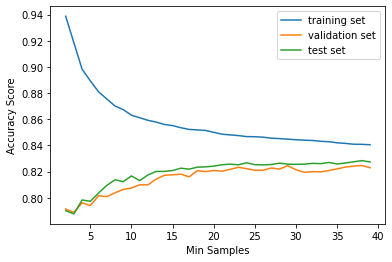

In [23]:
accTrain = []
accTest = []
accVal = []
lnS = []

for ln in range(2,40,1):
    lnS.append(ln)
    tree = DecisionTreeClassifier(min_samples_leaf=ln, random_state=0)
    tree.fit(X_train, y_train)
    trainAc = tree.score(X_train, y_train)
    accTrain.append(trainAc)
    testAc = tree.score(X_test, y_test)
    accTest.append(testAc)
    valAc = tree.score(X_val, y_val)
    accVal.append(valAc)   
    
plt.plot(lnS,accTrain, label="training set")
plt.plot(lnS,accVal, label="validation set")
plt.plot(lnS,accTest, label="test set")
plt.legend(loc="best")
plt.ylabel("Accuracy Score")
plt.xlabel("Min Samples")
plt.show()

# Train new model
tree = DecisionTreeClassifier(min_samples_leaf=35, random_state=0)
tree.fit(X_train, y_train)
y_predict = tree.predict(X_test)

# evaluation metrics
metric1 = balanced_accuracy_score(y_test, y_predict, adjusted=False)
metric2 = average_precision_score(y_test, y_predict, average='weighted')
metric3 = f1_score(y_test, y_predict, average='weighted')

In [24]:
print("Model score accuracy: %.3f" % accuracy_score)
print("Model score Metric 1: %.3f" % metric1)
print("Model score Metric 2: %.3f" % metric2)
print("Model score Metric 3: %.3f" % metric3)

Model score accuracy: 0.827
Model score Metric 1: 0.697
Model score Metric 2: 0.461
Model score Metric 3: 0.810


In [25]:
tree = DecisionTreeClassifier(min_samples_leaf=40, max_depth=8, random_state=0)
tree.fit(X_train, y_train)
y_predict = tree.predict(X_test)

# evaluation metrics
metric1 = balanced_accuracy_score(y_test, y_predict, adjusted=False)
metric2 = average_precision_score(y_test, y_predict, average='weighted')
metric3 = f1_score(y_test, y_predict, average='weighted')

print("Model score accuracy: %.3f" % accuracy_score)
print("Model score Metric 1: %.3f" % metric1)
print("Model score Metric 2: %.3f" % metric2)
print("Model score Metric 3: %.3f" % metric3)

Model score accuracy: 0.827
Model score Metric 1: 0.684
Model score Metric 2: 0.468
Model score Metric 3: 0.809


YOUR ANSWER HERE

In [26]:
"""
Eventually, the best model is that, resulting from a grid search which uses 
cross validation (first code cell of section 3.3).
"""

'\nEventually, the best model is that, resulting from a grid search which uses \ncross validation (first code cell of section 3.3).\n'